# Project1_Classification_Group16_Dsouza_Bhatia


# **Mobile-Phone-Price-Classification**
It is a machine learning based project to solve the following problem 

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

###**Problem Description**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

Data Description
The data has been divided into 2 groups : • Training Set (train.csv) • Test Set (test.csv) The training set should be used to build your machine learning models. For the training set we provide the outcome( also known as target or class label) for each mobile sales data point. The test set should be used to see how well your model performs on unseen data. For the test set we do not provide the outcome(target variable) for each mobile sales data point. For each data point in the test set use the model you trained to predict price range. The training set contains 2000 data points. Each data point has 20 features and one target variable.

The test set contains 2000 data points. Each data point has 21 features.

###**Feature name,	Feature description,	Type**

ID, ID,	Numeric

Battery_power,	Total energy a battery can store in mAh,	Numeric

Blue,	Has bluetooth or not,	Boolean

Clock_speed,	Speed at which microprocessor executes instructions,	Numeric

Dual_sim,	Has dual sim support or not,	Boolean

FC, Front	Camera mega pixels,	Numeric

Four_g,	Has 4G or not,	Boolean

Int_memory,	Internal Memory in Gigabytes,	Numeric

M_dep,	Mobile Depth in cm,	Numeric

Mobile_wt,	Weight of mobile phone,	Numeric

N_cores,	Number of cores of processor,	Numeric

PC,	Primary Camera mega pixels,	Numeric

PX_height,	Pixel Resolution Height,	Numeric

PX_width,	Pixel Resolution Width,	Numeric

RAM,	Random Access Memory in Megabytes,	Numeric

SC_h,	Screen Height of mobile in cm,	Numeric

SC_w,	Screen Width of mobile in cm,	Numeric

Talk_time,	Longest time that battery will last by a call,	Numeric

Three_g,	Has 3G or not,	Boolean

Touch_screen,	Has touch screen or not,	Boolean

Wifi,	Has wifi or not,	Numeric

Price Range, Price range of mobile phones, Numeric

# **DATA PREPROCESSING**

##Library Imports

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
from google.colab import files
uploaded = files.upload()

Saving Mobile.csv to Mobile (1).csv


## Reading the data into a pandas dataframe

In [86]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Mobile.csv']))

In [87]:
print("The dataset has {} rows" .format(data.shape[0]))
print("The dataset has {} columns" .format(data.shape[1]))
print(data.shape)

The dataset has 2000 rows
The dataset has 21 columns
(2000, 21)


In [88]:
data.dtypes

battery_power    float64
blue               int64
clock_speed      float64
dual_sim         float64
fc               float64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram                int64
sc_h             float64
sc_w               int64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
price_range        int64
dtype: object

In [89]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1821.000000,2000.0000,1895.000000,1879.000000,1875.000000,2000.000000,1757.000000,2000.000000,1835.000000,1829.000000,1970.000000,1964.000000,1961.000000,2000.000000,1817.000000,2000.000000,1952.000000,1881.000000,1862.000000,1813.000000,2000.000000
mean,1239.704558,0.4950,1.491029,0.509313,4.302400,0.521500,31.069437,0.501750,139.481199,4.523237,9.908122,644.596232,1253.007649,2124.213000,12.290589,5.767000,11.113730,0.761829,0.505371,0.511859,1.500000
std,441.164967,0.5001,0.810330,0.500046,4.327787,0.499662,17.908645,0.288416,35.331211,2.295255,6.068860,443.948014,432.361987,1084.732044,4.221077,4.356398,5.454568,0.426078,0.500105,0.499997,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.000000,0.0000,0.600000,0.000000,1.000000,0.000000,15.000000,0.200000,108.500000,3.000000,5.000000,281.750000,876.000000,1207.500000,9.000000,2.000000,6.750000,1.000000,0.000000,0.000000,0.750000
50%,1230.000000,0.0000,1.400000,1.000000,3.000000,1.000000,31.000000,0.500000,139.000000,4.000000,10.000000,564.000000,1248.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1617.000000,1.0000,2.200000,1.000000,7.000000,1.000000,45.000000,0.800000,169.000000,7.000000,15.000000,946.250000,1634.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Transformation

In [90]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [91]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

###Checking for missing values in the dataset

In [92]:
data.isnull().sum()

battery_power    179
blue               0
clock_speed      105
dual_sim         121
fc               125
four_g             0
int_memory       243
m_dep              0
mobile_wt        165
n_cores          171
pc                30
px_height         36
px_width          39
ram                0
sc_h             183
sc_w               0
talk_time         48
three_g          119
touch_screen     138
wifi             187
price_range        0
dtype: int64

We can see that the data has multiple missing data points.

In [93]:
percent_missing

battery_power     8.95
blue              0.00
clock_speed       5.25
dual_sim          6.05
fc                6.25
four_g            0.00
int_memory       12.15
m_dep             0.00
mobile_wt         8.25
n_cores           8.55
pc                1.50
px_height         1.80
px_width          1.95
ram               0.00
sc_h              9.15
sc_w              0.00
talk_time         2.40
three_g           5.95
touch_screen      6.90
wifi              9.35
price_range       0.00
dtype: float64

The data has the above mentioned percentage of missing data per column.

The dataset satisfies the condition of having NULLS to work with. However, these are important columns and cannot be dropped completely. As they are numerical, we will impute values into these fields.



There are blank cells. Let's first fill the blank cells with NaN

In [94]:
data.replace(" ", np.NaN, inplace = True)

Imputing means into the NaN in each column that originally had blank cells (now filled with NaN)




In [95]:
data['battery_power'].fillna(data['battery_power'].mean(), inplace = True) 
data['clock_speed'].fillna(data['clock_speed'].mean(), inplace = True) 
data['dual_sim'].fillna(data['dual_sim'].mean(), inplace = True) 
data['fc'].fillna(data['fc'].mean(), inplace = True) 
data['int_memory'].fillna(data['int_memory'].mean(), inplace = True) 
data['mobile_wt'].fillna(data['mobile_wt'].mean(), inplace = True) 
data['n_cores'].fillna(data['n_cores'].mean(), inplace = True) 
data['pc'].fillna(data['pc'].mean(), inplace = True) 
data['px_height'].fillna(data['px_height'].mean(), inplace = True) 
data['px_width'].fillna(data['px_width'].mean(), inplace = True) 
data['sc_h'].fillna(data['sc_h'].mean(), inplace = True) 
data['talk_time'].fillna(data['talk_time'].mean(), inplace = True) 
data['three_g'].fillna(data['three_g'].mean(), inplace = True) 
data['touch_screen'].fillna(data['touch_screen'].mean(), inplace = True) 
data['wifi'].fillna(data['wifi'].mean(), inplace = True)

In [96]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [97]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1239.704558,0.4950,1.491029,0.509313,4.302400,0.521500,31.069437,0.501750,139.481199,4.523237,9.908122,644.596232,1253.007649,2124.213000,12.290589,5.767000,11.113730,0.761829,0.505371,0.511859,1.500000
std,420.949807,0.5001,0.788762,0.484676,4.190292,0.499662,16.784893,0.288416,33.841671,2.194890,6.023149,439.932322,428.123575,1084.732044,4.023230,4.356398,5.388682,0.413201,0.482535,0.476037,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,880.750000,0.0000,0.700000,0.000000,1.000000,0.000000,18.000000,0.200000,111.000000,3.000000,5.000000,286.000000,882.000000,1207.500000,9.000000,2.000000,7.000000,0.761829,0.000000,0.000000,0.750000
50%,1239.704558,0.0000,1.491029,0.509313,3.000000,1.000000,31.069437,0.500000,139.481199,4.523237,10.000000,577.500000,1253.007649,2146.500000,12.290589,5.000000,11.000000,1.000000,0.505371,0.511859,1.500000
75%,1583.000000,1.0000,2.100000,1.000000,7.000000,1.000000,43.000000,0.800000,166.250000,6.000000,15.000000,937.250000,1626.250000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **EXPLORATORY DATA ANALYSIS**


<b>Importing visualization and plotting libraries</b>

In [98]:
import seaborn as sb
from pandas.plotting import scatter_matrix
%matplotlib inline

### Correlation Matrix
We develop a correlation matrix heatmap to see which of the variables are very highly correlated. Highly correlated variables causes 'Data Leakage' or Multicollinearity, which reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model.

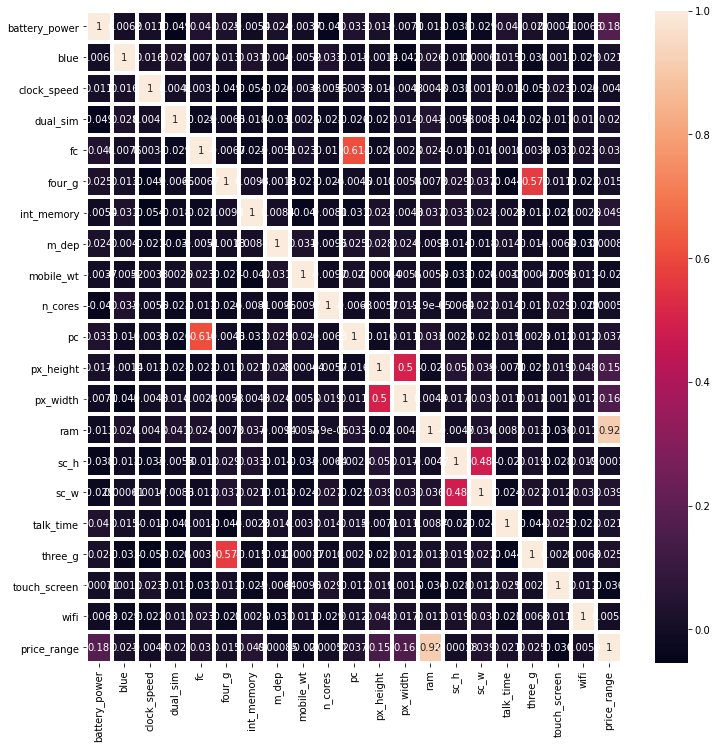

In [99]:
a= data.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(a,annot= True,linewidths=3)

## Identifying Outliers
Outliers can skew the data and manipulate the final result. Hence, we check for outliers.

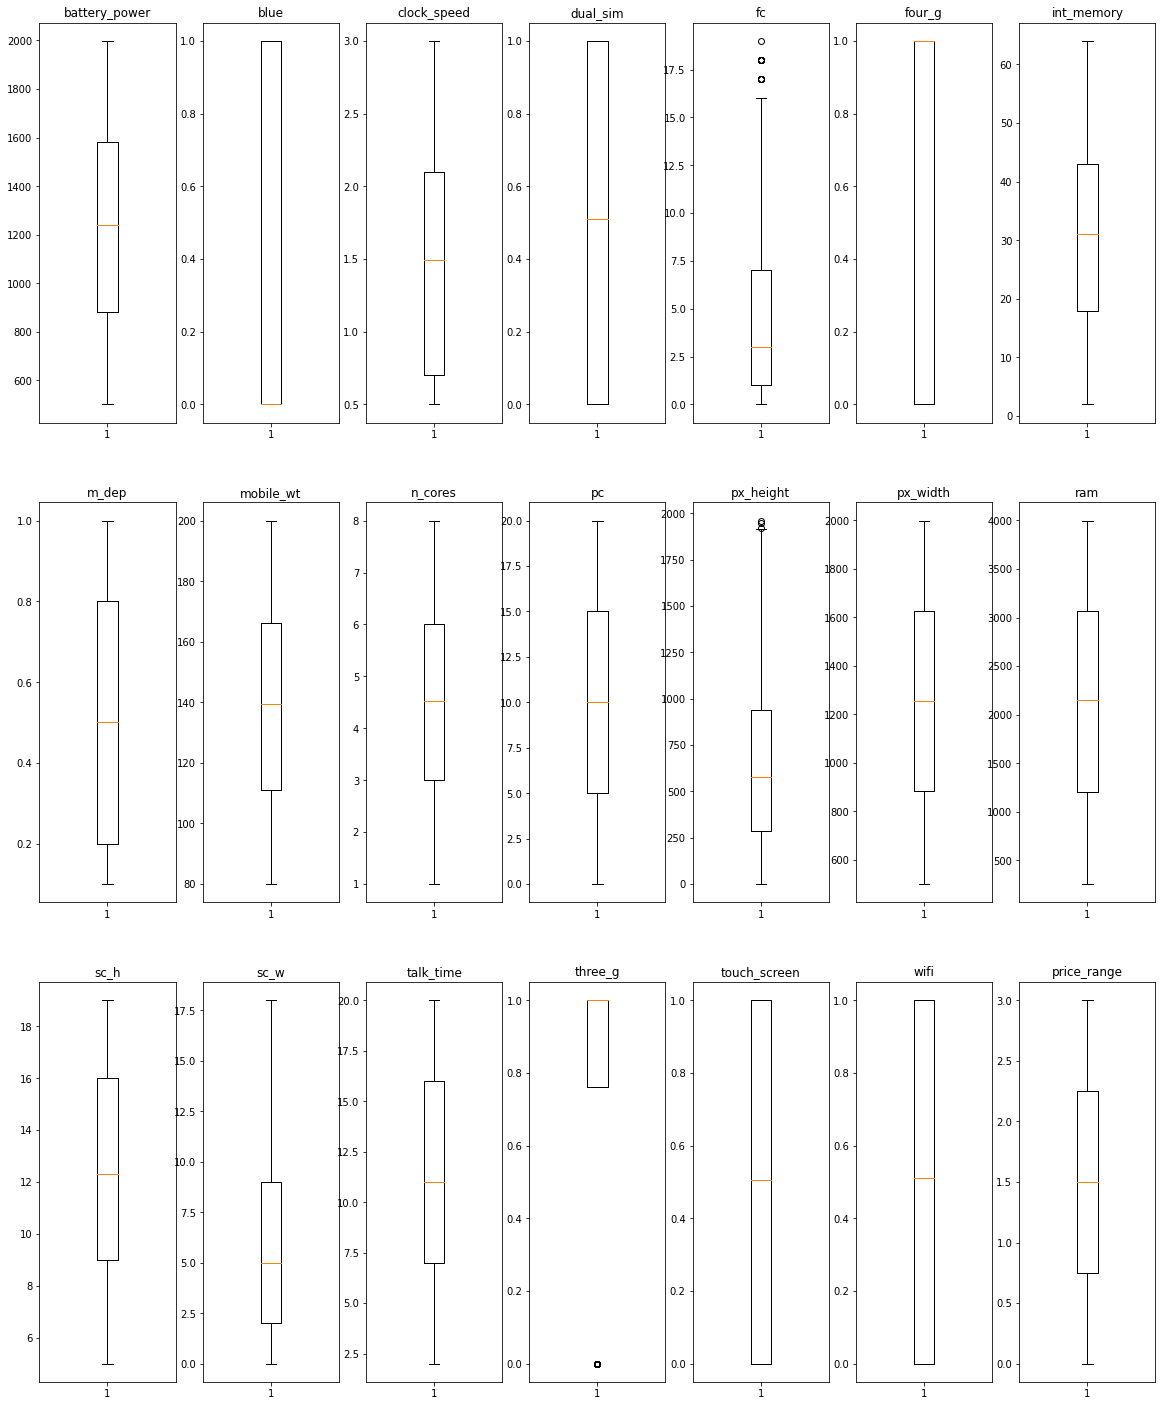

In [100]:
column_dict ={'battery_power':1, 'blue':2, 'clock_speed':3, 'dual_sim':4, 'fc':5,
       'four_g':6, 'int_memory':7, 'm_dep':8, 'mobile_wt':9, 'n_cores':10,
       'pc':11, 'px_height':12, 'px_width':13, 'ram':14, 'sc_h':15,
       'sc_w':16, 'talk_time':17, 'three_g':18, 'touch_screen':19,
       'wifi':20, 'price_range':21}

plt.figure(figsize=(20,25))

for feature,i in column_dict.items():
                     plt.subplot(3,7,i)
                     plt.boxplot(data[feature])
                     plt.title(feature)

plt.show()

Split the data into Train and Test set. Default for test is 0.25. We have set it to 0.2 to explore this parameter

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = data.drop('price_range',axis=1)
y = data['price_range']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Scaling the dataset
Standard Scaler removes the mean and scales the data to unit variance. StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 3, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [103]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.780662,-0.981423,0.758584,-1.046443,-0.777738,-1.036932,0.778958,0.348367,-1.302653,0.218672,-1.297654,-1.122820,-0.753052,1.310290,0.911009,1.393192,-0.780816,0.577041,1.025187,1.016484
1,1.420814,-0.981423,-1.265459,1.014584,0.019372,-1.036932,0.180053,0.696733,0.090508,-1.605330,1.026427,-0.768745,0.663031,-0.952253,-0.017852,-1.325231,-0.219357,-1.842253,-1.047444,-1.084111
2,-1.227099,-0.981423,1.770606,-1.046443,0.670500,-1.036932,-1.496882,0.696733,-1.095161,0.674673,-0.301619,-0.556751,-0.284150,-1.172016,-0.841836,-1.098696,-1.716580,0.577041,-1.047444,-1.084111
3,-1.725502,-0.981423,-0.885951,-1.046443,0.670500,0.964384,0.659177,-0.696733,-1.332294,-1.605330,-0.301619,-1.382175,-1.653344,-1.337071,0.159789,1.393192,-0.780816,0.577041,-1.047444,-1.084111
4,1.623954,1.018929,0.252573,1.014584,-0.777738,0.964384,0.120162,-0.348367,0.015847,-0.693329,-1.297654,0.744533,-0.021548,0.355200,-1.593055,-1.098696,0.529254,0.577041,-1.047444,-0.008903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.168069,1.018929,1.644103,-1.046443,-0.294992,0.964384,0.299834,1.741833,-0.591251,0.674673,1.690450,-0.665003,-1.723679,1.364072,1.161415,2.299333,-0.406510,0.577041,-1.047444,-1.084111
1596,-0.190138,-0.981423,-1.012454,1.014584,-0.777738,0.964384,-0.119400,0.696733,-0.472685,-1.149329,1.690450,-0.768745,1.251503,-0.521999,1.161415,0.713586,0.716407,0.577041,0.000003,1.016484
1597,0.002857,-0.981423,0.505579,-1.046443,-0.777738,0.964384,0.004540,1.045100,1.750444,-1.605330,-1.297654,-0.854445,1.035808,0.411764,-0.591430,0.487051,-1.342274,0.577041,1.025187,-1.084111
1598,0.256299,-0.981423,-0.011781,-1.046443,0.187754,-1.036932,0.778958,0.348367,-0.205909,-1.605330,0.694416,-0.491348,-0.692095,0.351491,1.411822,-0.872161,-0.032205,0.577041,-1.047444,1.016484


In [104]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.509044,1.018929,-1.265459,1.014584,-0.777738,-1.036932,0.180053,0.696733,0.015847,-0.237328,-1.131648,-0.906316,-0.537357,1.218490,-1.342649,-0.192555,-1.155121,0.000835,1.025187,-1.084111
1,-0.346036,1.018929,-1.265459,1.014584,1.394620,-1.036932,-1.197429,0.000000,0.831551,-0.693329,0.694416,-0.414669,-1.620520,-1.268453,0.410196,-0.419090,-0.032205,-1.842253,1.025187,-1.084111
2,-0.414537,-0.981423,0.632082,-1.046443,-1.019111,-1.036932,-0.239181,-1.045100,-1.569428,0.001268,-0.467625,-1.016823,-1.594731,0.522109,-0.090617,-0.192555,1.465018,0.000835,-1.047444,-1.084111
3,0.178350,1.018929,0.885087,-1.046443,-1.019111,0.964384,0.539396,1.045100,-0.680177,1.130673,-1.463659,-0.730405,1.396862,0.860563,-0.841836,0.487051,1.090712,0.577041,1.025187,1.016484
4,0.002857,-0.981423,0.758584,1.014584,3.325604,0.964384,0.004540,0.000000,1.691161,1.130673,1.690450,0.676875,1.087387,-1.299053,0.410196,-0.192555,-0.010920,0.577041,1.025187,1.016484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.669644,-0.981423,-1.265459,1.014584,-0.053619,-1.036932,0.719067,1.393466,0.120150,0.218672,-0.301619,1.344432,0.583318,-0.623999,-0.090617,0.713586,-0.406510,0.577041,1.025187,1.016484
396,-1.014510,-0.981423,-0.885951,-1.046443,1.394620,-1.036932,-0.598524,1.393466,0.015847,1.130673,1.524444,1.806760,1.087387,-0.770508,1.411822,0.260516,-1.529427,0.000835,-1.047444,-1.084111
397,-0.823180,1.018929,0.885087,1.014584,-0.053619,-1.036932,0.778958,0.000000,1.750444,1.586674,0.528410,0.952017,1.432030,-1.255471,-1.342649,-0.645626,-1.529427,-1.842253,-1.047444,-1.084111
398,-1.394808,-0.981423,0.505579,0.003266,-0.053619,-1.036932,-1.377101,1.741833,-1.421220,0.218672,1.524444,0.376926,1.722749,0.821618,-1.092243,0.260516,-1.342274,-1.842253,-1.047444,1.016484


## Models and Model Evaluations


### KNN Classifiers

In [105]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,50):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

### Plot for Train Score and Test Score for KNN Classifiers



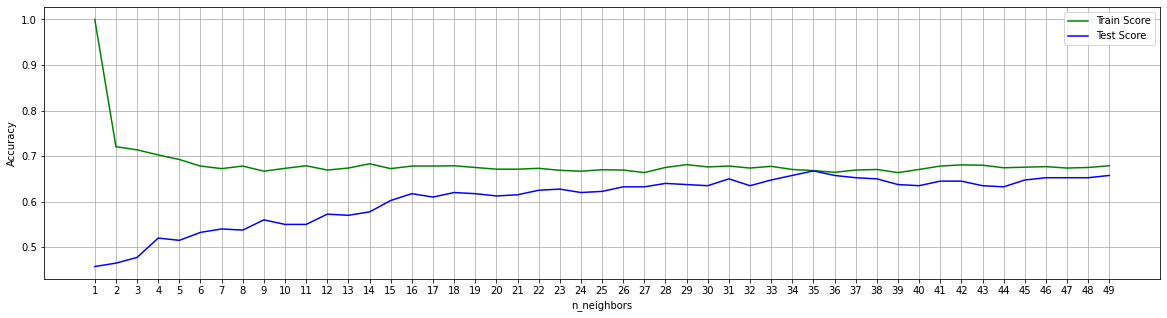

In [106]:
x_axis = range(1,50)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(1,50))
plt.grid()
plt.legend()

### Finding Train Score, Test Score and R Square



In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("R Squared: {:.4f} ".format(metrics.r2_score(y_test, prediction)))

Train score: 0.6925
Test score: 0.5150
R Squared: 0.4087 


### Using Grid Search
We the GridSearchCV to find the best hyperparameters(in KNN case k or number of nearest neighbours) for the model

In [108]:
from sklearn.metrics import mean_squared_error
param_grid_knn = {'n_neighbors':range(1,50), 'weights':['distance','uniform'],'p': [1,2], 'n_jobs':[-1]}
print("Parameter grid:\n{}".format(param_grid_knn))

from sklearn.model_selection import GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, return_train_score=True, cv=10)
grid_search_knn.fit(X_train, y_train)
prediction = grid_search_knn.predict(X_test)
print("Best parameters: {}".format(grid_search_knn.best_params_))

Parameter grid:
{'n_neighbors': range(1, 50), 'weights': ['distance', 'uniform'], 'p': [1, 2], 'n_jobs': [-1]}
Best parameters: {'n_jobs': -1, 'n_neighbors': 47, 'p': 1, 'weights': 'distance'}


Best Parameters for KNN Classifier using Grid Search : 'n_jobs': -1, 'n_neighbors': 47, 'p': 1, 'weights': 'distance'

Fitting the best parameters we get:

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
knn= KNeighborsClassifier(n_neighbors =47 , weights = 'distance', p=1, n_jobs = -1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("R Squared: {:.4f} ".format(metrics.r2_score(y_test, prediction)))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))

Train score: 1.0000
Test score: 0.6900
R Squared: 0.7570 
MSE:  0.3175


In [110]:
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
results = pd.DataFrame(grid_search_knn.cv_results_)
display(results.tail())

Best cross-validation score: 0.70


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
191,0.002743,0.000192,0.018728,0.001812,-1,48,2,uniform,"{'n_jobs': -1, 'n_neighbors': 48, 'p': 2, 'wei...",0.58750,0.64375,0.53750,0.61250,0.67500,0.63125,0.57500,0.54375,0.61250,0.65625,0.607500,0.043910,88,0.675694,0.665278,0.674306,0.673611,0.660417,0.668056,0.670833,0.686111,0.663889,0.668056,0.670625,0.006924
192,0.002887,0.000405,0.015448,0.001215,-1,49,1,distance,"{'n_jobs': -1, 'n_neighbors': 49, 'p': 1, 'wei...",0.71250,0.67500,0.61250,0.69375,0.73750,0.70625,0.71875,0.66250,0.73125,0.73125,0.698125,0.036875,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
193,0.002773,0.000188,0.018344,0.001121,-1,49,1,uniform,"{'n_jobs': -1, 'n_neighbors': 49, 'p': 1, 'wei...",0.70625,0.66875,0.61875,0.72500,0.73125,0.70000,0.68750,0.66250,0.72500,0.73125,0.695625,0.034916,6,0.745833,0.737500,0.753472,0.731944,0.740278,0.744444,0.731944,0.747917,0.742361,0.736111,0.741181,0.006639
194,0.002841,0.000290,0.015238,0.002438,-1,49,2,distance,"{'n_jobs': -1, 'n_neighbors': 49, 'p': 2, 'wei...",0.59375,0.64375,0.53750,0.64375,0.68750,0.63125,0.60000,0.55000,0.61875,0.68125,0.618750,0.047269,64,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
195,0.002771,0.000363,0.017084,0.000569,-1,49,2,uniform,"{'n_jobs': -1, 'n_neighbors': 49, 'p': 2, 'wei...",0.60000,0.65000,0.54375,0.61875,0.67500,0.61875,0.57500,0.56250,0.61875,0.64375,0.610625,0.038936,82,0.679167,0.664583,0.675000,0.679167,0.663889,0.666667,0.668750,0.682639,0.661806,0.669444,0.671111,0.006980


### Cross Validation
Finding the average Training and Testing Score using Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score
train_cvscore = cross_val_score(knn, X_train, y_train, cv=10)
print(train_cvscore)
print("The average cross validated train score is: {:.4f}".format(train_cvscore.mean()))

[0.70625 0.68125 0.6125  0.68125 0.73125 0.725   0.725   0.675   0.7625
 0.7375 ]
The average cross validated train score is: 0.7037


In [112]:
test_cvscore = cross_val_score(knn, X_test, y_test, cv=10)
print(test_cvscore)

#Average Cross Validation Score for Train Set
print("The average cross validated test score is: {:.4f}".format(test_cvscore.mean()))

[0.75  0.575 0.65  0.725 0.7   0.575 0.7   0.525 0.625 0.7  ]
The average cross validated test score is: 0.6525


In [113]:
np.where(X.columns == 'price_range')

(array([], dtype=int64),)

Using the best fit KNN regressor that we got above k=47, we were able to minimize the MSE and get a high R2 scpre of 0.757. Let's fit this chosen KNN regressor to the RAM

Text(0.5, 0, 'RAM')

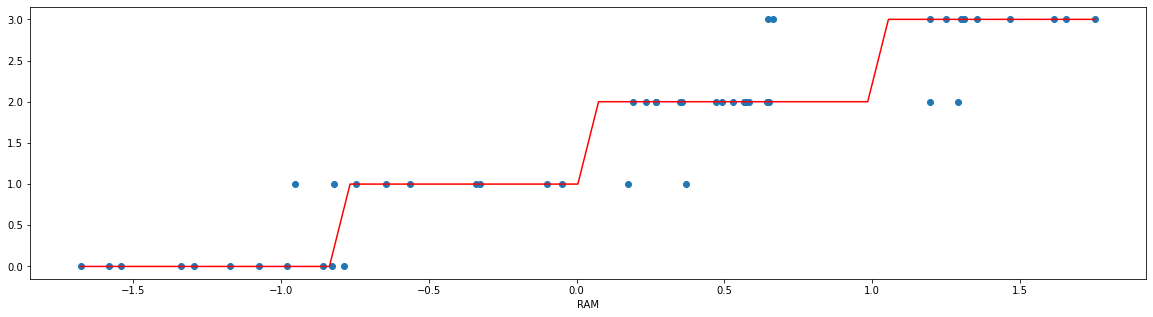

In [114]:
X_b = X_train[:50,13].reshape(-1,1)
y_b = y_train[:50]

knn = KNeighborsClassifier(n_neighbors =47 , weights = 'distance', p=1, n_jobs=-1)
knn.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('RAM')

# Linear SVC

In [115]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(dual = False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction1 = linearsvc.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction1)))

Train score: 0.8494
Test score: 0.8400
R Square: 0.8775 


### Using Grid Search
We the GridSearchCV to find the best hyperparameters(in SVC case C & penalty)

In [116]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = linearsvc,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

We have found the best parameters, C=1 and penalty=l1 for the linear SVC model using Grid Search. Let us fit this into our Linear SVC model

In [117]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(penalty = 'l1', C= 10, dual=False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction2 = linearsvc.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction2)))
print("MSE:",mean_squared_error(y_test, prediction2))

Train score: 0.8656
Test score: 0.8475
R Square: 0.8833 
MSE: 0.1525


The scores after fitting our model are:
Train score: 0.8656,
Test score: 0.8475,
R Square: 0.8833 


Now, Checking Cross Validation scores


In [118]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(linearsvc,X_train,y_train,cv=5)
test_score_list = cross_val_score(linearsvc,X_test,y_test,cv=5)
print("Avg Train Score: %.4f"%train_score_list.mean())
print("Avg Test Score: %.4f"%test_score_list.mean())

Avg Train Score: 0.8363
Avg Test Score: 0.8000


Average Train Score after cross validation is 0.8363
Average Test Score after cross validation is 0.8363

Text(0, 0.5, 'Battery Power')

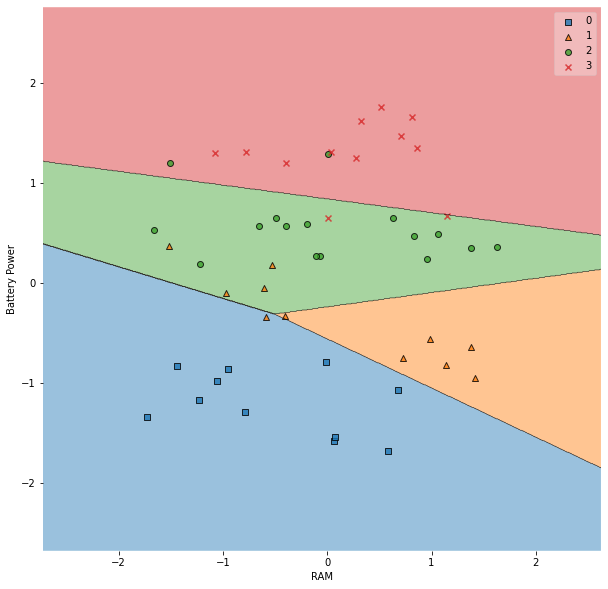

In [119]:
from mlxtend.plotting import plot_decision_regions

X1 = X_train[:50, [0,13]]
y1 = y_train[:50]
y1_train = np.array(y1)
clf = LinearSVC()
clf.fit(X1,y1)

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X1, y1_train, clf)
plt.xlabel("RAM")
plt.ylabel("Battery Power")

Classification separation graph for Linear SVC

In [120]:
np.where(X.columns=="ram")

(array([13]),)

In [121]:
X1 = X_train[:50, [0,13]]
y1 = y_train[:50]


In [122]:
y1_train = np.array(y1)

# Logistic Regression

We are using the SoftMax logistic regression method we build our model. We will use multi_class="multinomial",solver="lbfgs", C=10

In [123]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X1, y1_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

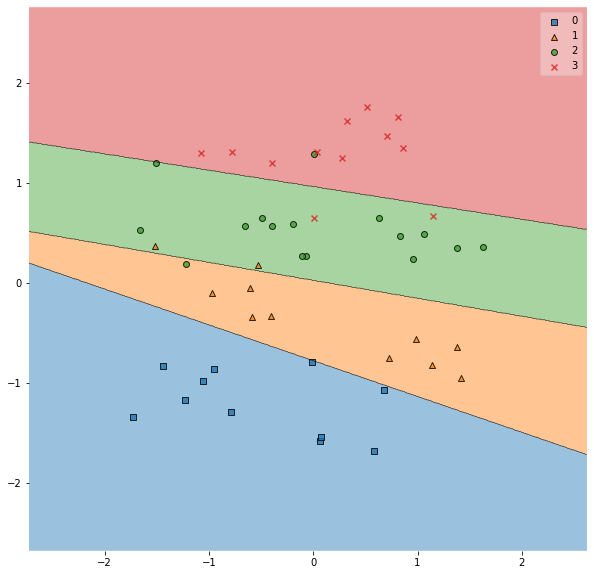

In [124]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X1, y1_train, clf = softmax_reg)

Classification separation graph for SoftMax Logistic Regression

### Using Grid Search
We the GridSearchCV to find the best hyperparameters(in Softmax, we find, C, penalty using cv=5 and scoring is based on accuracy)

In [125]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l2']}]
grid_search = GridSearchCV(estimator = softmax_reg,
                           param_grid = parameters,
                           scoring = 'accuracy', cv=5)
grid_search = grid_search.fit(X1, y1_train)
grid_search.best_params_

{'C': 100, 'penalty': 'l2'}

From the Grid Search we find best parameters to be C=100 and Penalty = l2

We fit these parameters into our model:

In [126]:
best_softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty ='l2', C = 100)

best_softmax.fit(X_train,y_train)
prediction3 = best_softmax.predict(X_test)

print('Train score: {:.4f}'.format(best_softmax.score(X_train, y_train)))
print('Test score:  {:.4f}'.format(best_softmax.score(X_test, y_test)))
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction3)))
print("MSE:",mean_squared_error(y_test, prediction3))

Train score: 0.9587
Test score:  0.9400
R Square: 0.9541 
MSE: 0.06


After fitting our model we get Train Score of 0.9587, Test score of 0.9400 and R Square of 0.9541

# Decision Tree Classifier

We run a Decision Tree Classifier on our dataset and find the accuracy on training and test data set

In [127]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
prediction1 = dtree.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test, prediction1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.807
R Square: 0.8469 


After running Decision Tree Classifier we get accuracy on training set as 1, test score as 0.807 and R square to be 0.8469

We now run our Decision Tree Classifier after setting Depth to 4 and random state as 0

In [128]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
prediction1 = dtree.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test, prediction1)))

Accuracy on training set: 0.831
Accuracy on test set: 0.792
R Square: 0.8412 


After running Decision Tree Classifier with depth 4 and random state 0, we get accuracy on training set as 0.831, test score as 0.792 and R square to be 0.8412

### Using Grid Search
We the GridSearchCV to find the best hyperparameters(in Decision Tree, we find, Max Depth, and criterion based on accuracy)

In [129]:
from sklearn.model_selection import GridSearchCV
parameters = [{"max_depth": [1,2,3,4,5,6,7], "criterion": ["gini", "entropy"]}]
grid_search = GridSearchCV(estimator = dtree,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6}

We get criterion as entropy and max depth as 6. We will now run our model based on these parameters

In [130]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))
prediction4 = dtree.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction4)))
print("MSE:",mean_squared_error(y_test, prediction4))

Train score: 0.9062
Test score: 0.8000
R Square: 0.8469 
MSE: 0.2


After running the model we get Train score as 0.9062, test score as 0.8000 and R quare as 0.8469

We use decision tree classifier to plot a graph for a sample of 50 datapoints

Text(0, 0.5, 'Price')

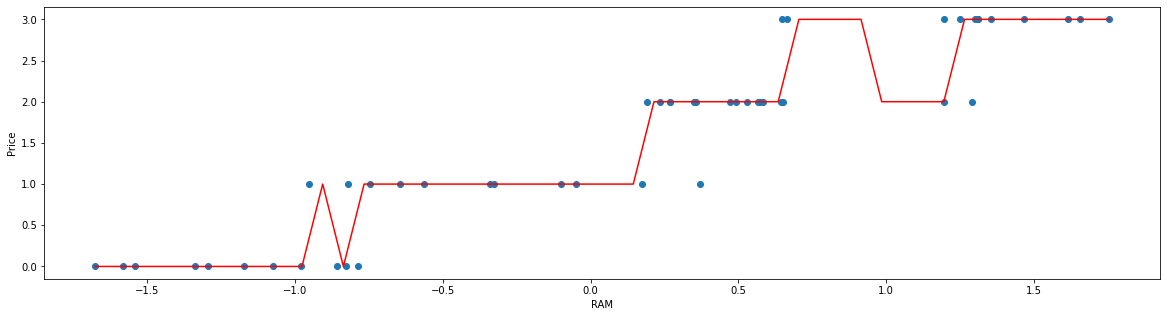

In [131]:
from sklearn.tree import DecisionTreeClassifier

X_b = X_train[:50,13].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeClassifier()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('RAM')
plt.ylabel('Price')

Running Cross Validation on Decision Tree Classifier

In [132]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(dtree,X_train,y_train,cv=5)
test_score_list = cross_val_score(dtree,X_test,y_test,cv=5)
print("Avg Train Score: %.4f"%train_score_list.mean())
print("Avg Test Score: %.4f"%test_score_list.mean())

Avg Train Score: 0.8200
Avg Test Score: 0.8025


After running cross validation, we get average train score as 0.8200 and average test score as 0.8025

In [133]:
dt_train_score=[]
dt_test_score=[]

for i in range(1,15):
    dtClassifier = DecisionTreeClassifier(max_depth=i,random_state= 0)
    dtClassifier.fit(X_train, y_train)
    dt_train_score.append(dtClassifier.score(X_train, y_train))
    dt_test_score.append(dtClassifier.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

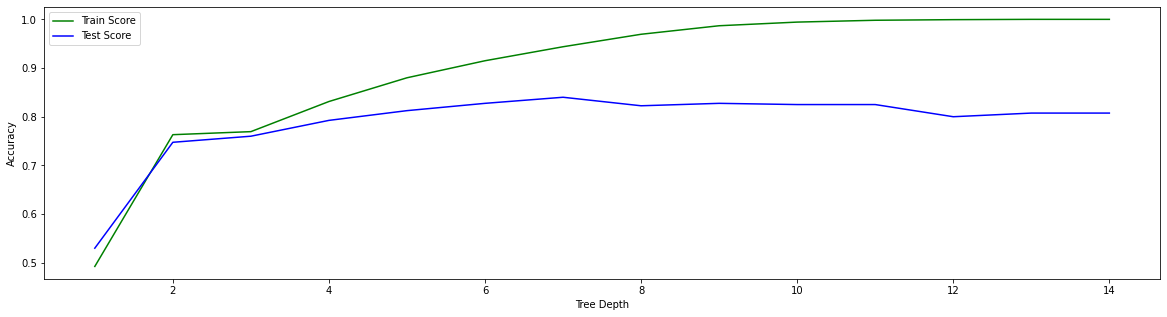

In [134]:
x_axis = range(1,15)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, dt_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, dt_test_score, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')

We can see a plot for our Decision Tree Classifier to see the tree depth for Train and test scores.

# Kernal Models

Below we see a general comparision between Linear SVC, SVC with Linear Kernel, SVC with RBF Kernel, SVC with Polynomial Kernel(degree 3)

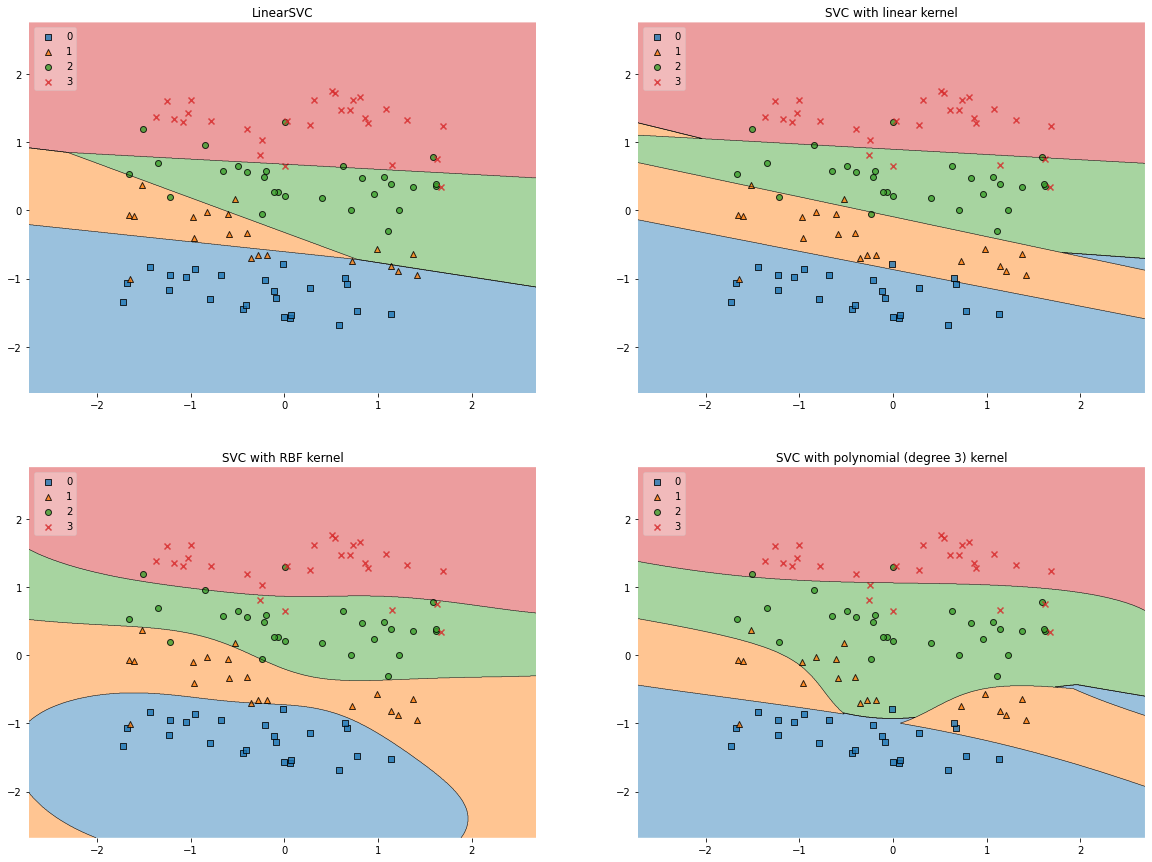

In [135]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

X1 = X_train[:100, [0,13]]
y1 = y_train[:100]
y1_train = np.array(y1)

C = 1
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X1, y1_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1_train,
                                clf=clf, legend=2)
    plt.title(lab)
  

### Polynomial SVC Kernel

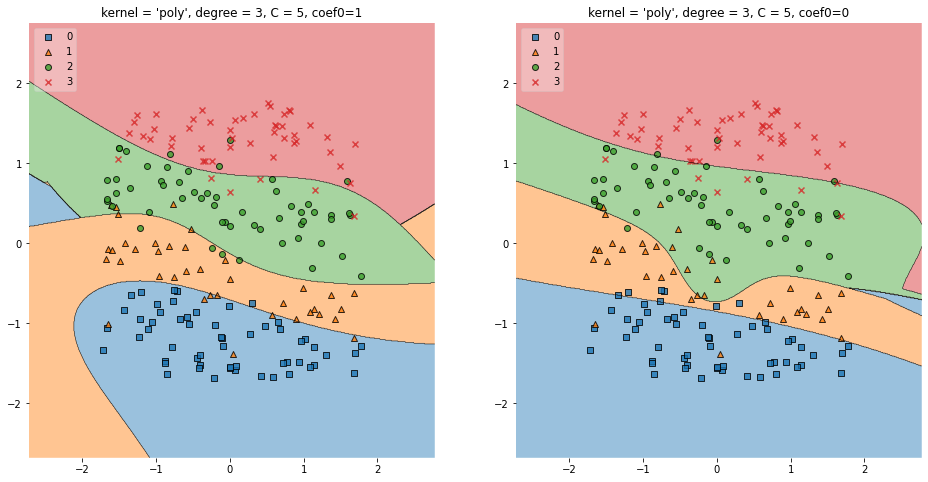

In [139]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

X1 = X_train[:200, [0, 13]]
y1 = y_train[:200]
y1_train = np.array(y1)

clf1 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=1)
clf1.fit(X1,y1_train)

clf2 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=0)
clf2.fit(X1,y1_train)

fig = plt.figure(figsize=(16,8))

labels = ["kernel = 'poly', degree = 3, C = 5, coef0=1", "kernel = 'poly', degree = 3, C = 5, coef0=0"]
for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X1, y1_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1_train, clf=clf, legend=2)
    plt.title(lab)

### Radial Based Function SVC Kernel using Grid Search

In [140]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [142]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [143]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
prediction5 = grid_search.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction5)))
print("MSE:",mean_squared_error(y_test, prediction5))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.92
R Square: 0.9426 
MSE: 0.075


Best parameters after running RBF grid search are: C = 100, gamma = 0.001.
Best cross validation score we is 0.92

In [144]:
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.100909,0.005207,0.015649,0.000467,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.253125,0.25625,0.25625,0.25625,0.25625,0.255625,0.00125,15,0.25625,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
1,0.097624,0.001216,0.015380,0.000094,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.253125,0.25625,0.25625,0.25625,0.25625,0.255625,0.00125,15,0.25625,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
2,0.098601,0.001657,0.015647,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.253125,0.25625,0.25625,0.25625,0.25625,0.255625,0.00125,15,0.25625,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
3,0.098021,0.002488,0.016593,0.001233,0.001,1,"{'C': 0.001, 'gamma': 1}",0.253125,0.25625,0.25625,0.25625,0.25625,0.255625,0.00125,15,0.25625,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
4,0.099168,0.000840,0.015871,0.000220,0.001,10,"{'C': 0.001, 'gamma': 10}",0.253125,0.25625,0.25625,0.25625,0.25625,0.255625,0.00125,15,0.25625,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312


### Below we are plotting a correlation graph between C and Gamma


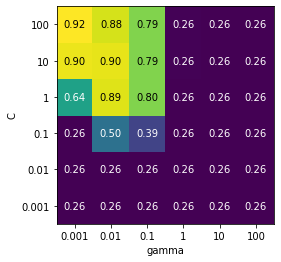

In [145]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

### Linear SVC Kernel using Grid Search

In [146]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_lin = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 5, return_train_score=True)
grid_ker_lin.fit(X_train,y_train)

print("Best parameters for kernel SVC linear: {}".format(grid_ker_lin.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_lin.best_score_))
prediction6 = grid_ker_lin.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction6)))
print("MSE:",mean_squared_error(y_test, prediction6))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters for kernel SVC linear: {'C': 100, 'gamma': 0.001}
Best cross-validationscore: 0.94
R Square: 0.9502 
MSE: 0.065


Best parameters after running Linear Kernel grid search are: C = 100, gamma = 0.001.
Best cross validation score we is 0.94

In [147]:
results_lin = pd.DataFrame(grid_ker_lin.cv_results_)
# show the first 5 rows
display(results_lin.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050948,0.003597,0.008465,0.001263,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.490625,0.509375,0.5,0.490625,0.478125,0.49375,0.010458,31,0.496094,0.510156,0.509375,0.485938,0.483594,0.497031,0.011217
1,0.051292,0.004207,0.007896,0.000237,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.490625,0.509375,0.5,0.490625,0.478125,0.49375,0.010458,31,0.496094,0.510156,0.509375,0.485938,0.483594,0.497031,0.011217
2,0.047975,0.001327,0.007921,0.000170,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.490625,0.509375,0.5,0.490625,0.478125,0.49375,0.010458,31,0.496094,0.510156,0.509375,0.485938,0.483594,0.497031,0.011217
3,0.047993,0.000711,0.007887,0.000217,0.001,1,"{'C': 0.001, 'gamma': 1}",0.490625,0.509375,0.5,0.490625,0.478125,0.49375,0.010458,31,0.496094,0.510156,0.509375,0.485938,0.483594,0.497031,0.011217
4,0.048140,0.000890,0.007585,0.000111,0.001,10,"{'C': 0.001, 'gamma': 10}",0.490625,0.509375,0.5,0.490625,0.478125,0.49375,0.010458,31,0.496094,0.510156,0.509375,0.485938,0.483594,0.497031,0.011217


### Below we are plotting a correlation graph between C and Gamma


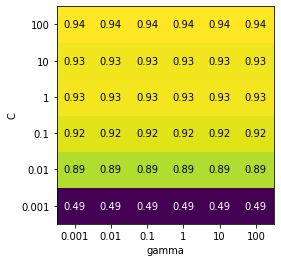

In [148]:
import mglearn
scores1 = np.array(results_lin.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores1, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

### Polynomial SVC Kernel using Grid Search

In [149]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_poly = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv = 5, return_train_score=True)
grid_ker_poly.fit(X_train,y_train)

print("Best parameters for kernel SVC Polynomial: {}".format(grid_ker_poly.best_params_))
print("Best cross-validation Score: {:.2f}".format(grid_ker_poly.best_score_))
prediction7 = grid_ker_poly.predict(X_test)
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,prediction7)))
print("MSE:",mean_squared_error(y_test, prediction7))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters for kernel SVC Polynomial: {'C': 0.001, 'gamma': 1}
Best cross-validation Score: 0.73
R Square: 0.8048 
MSE: 0.255


Best parameters after running Linear Kernel grid search are: C = 0.001, gamma = 1.
Best cross validation score we is 0.73

In [150]:
results_poly = pd.DataFrame(grid_ker_poly.cv_results_)
# show the first 5 rows
display(results_poly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060524,0.001564,0.009401,0.000629,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.253125,0.256250,0.256250,0.25625,0.256250,0.255625,0.001250,26,0.256250,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
1,0.058693,0.001456,0.008891,0.000202,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.253125,0.256250,0.256250,0.25625,0.256250,0.255625,0.001250,26,0.256250,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
2,0.058338,0.000430,0.008779,0.000132,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.253125,0.256250,0.256250,0.25625,0.256250,0.255625,0.001250,26,0.256250,0.255469,0.255469,0.255469,0.255469,0.255625,0.000312
3,0.074442,0.001504,0.007363,0.000089,0.001,1,"{'C': 0.001, 'gamma': 1}",0.725000,0.728125,0.728125,0.68125,0.778125,0.728125,0.030682,1,0.999219,0.998437,0.999219,0.997656,0.999219,0.998750,0.000625
4,0.074485,0.001891,0.007295,0.000107,0.001,10,"{'C': 0.001, 'gamma': 10}",0.718750,0.693750,0.725000,0.69375,0.753125,0.716875,0.022150,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### Below we are plotting a correlation graph between C and Gamma


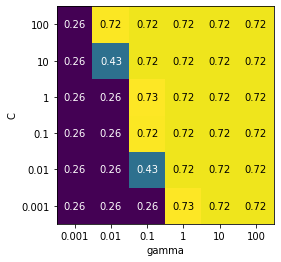

In [151]:
import mglearn
scores2 = np.array(results_poly.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores2, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [156]:
print("MSE KNN Classifier:",mean_squared_error(y_test, prediction))
print('MSE LinearSVC: ',mean_squared_error(y_test,prediction2))
print('MSE Logistic: ',mean_squared_error(y_test,prediction3))
print('MSE Decisiontree: ',mean_squared_error(y_test,prediction4))
print('MSE KernelRBF: ',mean_squared_error(y_test,prediction5))
print('MSE LinearK: ',mean_squared_error(y_test,prediction6))
print("MSE Poly:",mean_squared_error(y_test, prediction7))


MSE KNN Classifier: 0.3175
MSE LinearSVC:  0.1525
MSE Logistic:  0.06
MSE Decisiontree:  0.2
MSE KernelRBF:  0.075
MSE LinearK:  0.065
MSE Poly: 0.255


In [160]:
print("R Square KNN Classifier: {:.4f} ".format(metrics.r2_score(y_test,prediction)))
print('R Square LinearSVC: {:.4f} '.format(metrics.r2_score(y_test,prediction2)))
print('R Square Logistic: {:.4f} '.format(metrics.r2_score(y_test,prediction3)))
print('R Square Decisiontree: {:.4f} '.format(metrics.r2_score(y_test,prediction4)))
print('R Square KernelRBF: {:.4f} '.format(metrics.r2_score(y_test,prediction5)))
print('R Square LinearK: {:.4f} '.format(metrics.r2_score(y_test,prediction6)))
print("R Square Poly: {:.4f} ".format(metrics.r2_score(y_test,prediction7)))

R Square KNN Classifier: 0.7570 
R Square LinearSVC: 0.8833 
R Square Logistic: 0.9541 
R Square Decisiontree: 0.8469 
R Square KernelRBF: 0.9426 
R Square LinearK: 0.9502 
R Square Poly: 0.8048 


In [153]:
R2score_KNN = metrics.r2_score(y_test,prediction)
R2score_LinearSVC = metrics.r2_score(y_test,prediction2)
R2score_Logistic = metrics.r2_score(y_test,prediction3)
R2score_Decisiontree = metrics.r2_score(y_test,prediction4)
R2score_KernelRBF = metrics.r2_score(y_test,prediction5)
R2score_LinearK = metrics.r2_score(y_test,prediction6)
R2score_Poly = metrics.r2_score(y_test,prediction7)

MSE_KNN = mean_squared_error(y_test,prediction)
MSE_LinearSVC = mean_squared_error(y_test,prediction2)
MSE_Logestic = mean_squared_error(y_test,prediction3)
MSE_Decisiontree = mean_squared_error(y_test,prediction4)
MSE_KernelRBF = mean_squared_error(y_test,prediction5)
MSE_LinearK = mean_squared_error(y_test,prediction6)
MSE_Poly = mean_squared_error(y_test,prediction7)

<Figure size 1440x720 with 0 Axes>

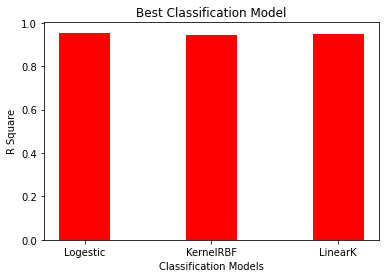

In [161]:
plt.figure(figsize=(20,10))

regs_i = 3
R2score_fin = [R2score_Logistic, R2score_KernelRBF, R2score_LinearK]

fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4

rects1 = plt.bar(index, R2score_fin, bar_width,
                    color='r',
                    label='R Square', align='center')

plt.xlabel('Classification Models')
plt.ylabel('R Square')
plt.title('Best Classification Model')
plt.xticks(index, ('Logestic','KernelRBF','LinearK'))
plt.show()

Although it is not very visible in the graph, the highest R Square value is for Logistic Softmax, followed by Kernel Linear and finally Kernel RBF

<Figure size 1440x720 with 0 Axes>

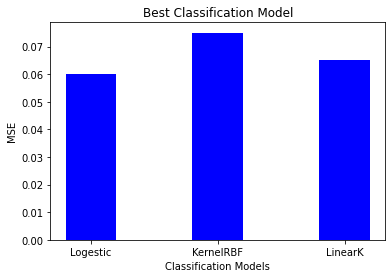

In [163]:
plt.figure(figsize=(20,10))

regs_i = 3
MSE_fin = [MSE_Logestic, MSE_KernelRBF, MSE_LinearK]

fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4

rects1 = plt.bar(index, MSE_fin, bar_width,
                    color='b',
                    label='MSE', align='center')

plt.xlabel('Classification Models')
plt.ylabel('MSE')
plt.title('Best Classification Model')
plt.xticks(index, ('Logestic','KernelRBF','LinearK'))
plt.show()

From the graph we can see that the lowest MSE value is for Logistic Softmax, followed by Kernel Linear and finally Kernel RBF

In [164]:
best_classifier = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty ='l2', C = 100)

best_classifier.fit(X_train,y_train)
best_prediction = best_classifier.predict(X_test)

print('Train score: {:.4f}'.format(best_classifier.score(X_train, y_train)))
print('Test score:  {:.4f}'.format(best_classifier.score(X_test, y_test)))
print("R Square: {:.4f} ".format(metrics.r2_score(y_test,best_prediction)))
print("MSE:",mean_squared_error(y_test, best_prediction))

Train score: 0.9587
Test score:  0.9400
R Square: 0.9541 
MSE: 0.06


### Our best model is Logistic SoftMax with

###Train score: 0.9587
###Test score:  0.9400
###R Square: 0.9541 
###MSE: 0.06